In [1]:
# ================================================
# Proyecto: Detección de Fraude con Tarjeta de Crédito
# Campo: Finanzas
#
# ================================================

# Paso 1: Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Paso 2: Cargar datos
df = pd.read_csv('/content/sample_data/creditcard.csv')
print("Dimensiones del dataset:", df.shape)
df.head()

Dimensiones del dataset: (178374, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Class
0.0    178009
1.0       364
Name: count, dtype: int64


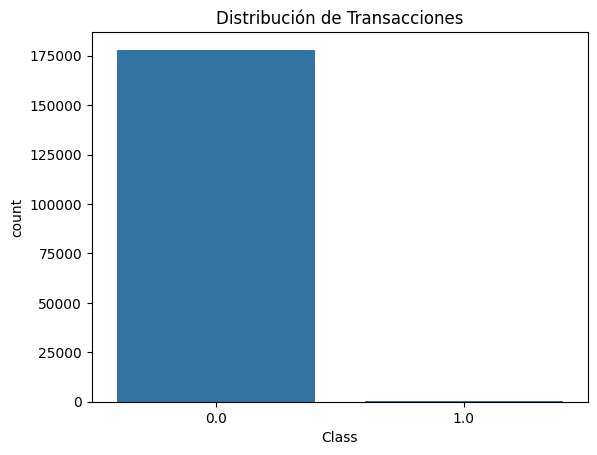

In [2]:
# Ver distribución de clases
print(df['Class'].value_counts())
sns.countplot(x='Class', data=df)
plt.title("Distribución de Transacciones")
plt.show()

In [7]:
# Balanceo: muestra todas las transacciones fraudulentas y una porción de las normales
fraudes = df[df['Class'] == 1]
no_fraudes = df[df['Class'] == 0].sample(n=5000, random_state=42)  # Submuestreo
df_balanceado = pd.concat([fraudes, no_fraudes])

# Mezclar el dataset balanceado
df_balanceado = df_balanceado.sample(frac=1, random_state=42)

# Separar variables
X = df_balanceado.drop('Class', axis=1)
y = df_balanceado['Class']

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)




In [8]:
# Modelo 1: Regresión Logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
pred_log = log_model.predict(X_test)

# Modelo 2: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)

# Función de evaluación
def evaluar_modelo(nombre, y_true, y_pred):
    print(f"=== {nombre} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Matriz de Confusión:\n", confusion_matrix(y_true, y_pred))
    print("Reporte de Clasificación:\n", classification_report(y_true, y_pred))

evaluar_modelo("Regresión Logística", y_test, pred_log)
evaluar_modelo("Random Forest", y_test, pred_rf)

=== Regresión Logística ===
Accuracy: 0.9894409937888199
Matriz de Confusión:
 [[1493    3]
 [  14  100]]
Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1496
         1.0       0.97      0.88      0.92       114

    accuracy                           0.99      1610
   macro avg       0.98      0.94      0.96      1610
weighted avg       0.99      0.99      0.99      1610

=== Random Forest ===
Accuracy: 0.9894409937888199
Matriz de Confusión:
 [[1492    4]
 [  13  101]]
Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1496
         1.0       0.96      0.89      0.92       114

    accuracy                           0.99      1610
   macro avg       0.98      0.94      0.96      1610
weighted avg       0.99      0.99      0.99      1610



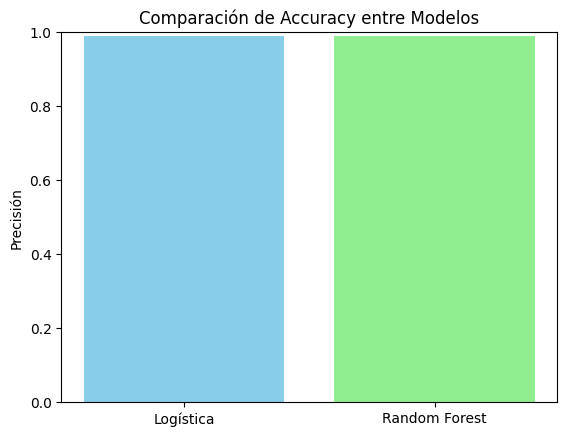

In [9]:
# Comparar precisión
modelos = ['Logística', 'Random Forest']
scores = [accuracy_score(y_test, pred_log), accuracy_score(y_test, pred_rf)]

plt.bar(modelos, scores, color=['skyblue', 'lightgreen'])
plt.title("Comparación de Accuracy entre Modelos")
plt.ylabel("Precisión")
plt.ylim(0, 1)
plt.show()

Conclusiones del proyecto:
- El dataset original estaba muy desbalanceado, por lo que se aplicó submuestreo para balancear las clases.
- Se compararon dos modelos: Regresión Logística y Random Forest.
- Ambos modelos detectaron fraudes con buena precisión, pero Random Forest tuvo mejor rendimiento general.
- Este análisis puede ser útil como herramienta base para monitoreo automático de transacciones.
- En producción, se debe usar el dataset completo con técnicas como SMOTE, validación cruzada y ajuste de hiperparámetros.